#Kaggle IMDB Horror Movies dataset

I saw this Halloween-special dataset and decided to give it a try: it's one thing doing exercises on DataCamp, it's another one to actually apply all I've learned so far to a "real thing", so let's try! Here's the dataset: https://www.kaggle.com/PromptCloudHQ/imdb-horror-movie-dataset/version/1

Let's load the usual tools first:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
horrors = pd.read_csv('IMDB Horror movies.csv')


Let's see what it is about:


In [3]:
horrors.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000"
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN


In [4]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 12 columns):
Title                3328 non-null object
Genres               3327 non-null object
Release Date         3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3076 non-null float64
Movie Run Time       2784 non-null object
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
dtypes: float64(1), object(11)
memory usage: 312.1+ KB



OK, so it's just a few columns, 3328 rows but lots of information missing and most columns are of the type 'object', which is not very useful. There's some redundant information, like the year in the 'Title' column, but there's also some useful additionalinformation in the 'Plot' column. I can start with some cleanup. Please note that everything here is just the clean version of the notebook, as it took hours to find out how to do things :) 



To begin with, I can convert the 'Release Date' into timestamps, and then extract years, months and days of the week from there. To do it in one go I wrote a simple function.


In [40]:
horrors.loc[:,'Release Date'] = pd.to_datetime(horrors.loc[:,'Release Date'])

In [35]:
def datesplitter(date):
    '''extracts year, month, day and day of the week from a timestamp'''
    year = date.year
    month = date.month
    day = date.day
    weekday = date.weekday_name
    return year, month, day, weekday


And now to apply this to our dataframe: 


In [41]:
horrors[['RelYear', 'RelMonth', 'RelDay', 'RelWeekday']] = horrors.apply(lambda date: pd.Series(datesplitter(date['Release Date'])), axis = 1)

In [42]:
horrors.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,RelYear,RelMonth,RelDay,RelWeekday
0,Gut (2012),Drama| Horror| Thriller,2012-10-26,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN,2012,10,26,Friday
1,The Haunting of Mia Moss (2017),Horror,2017-01-13,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000",2017,1,13,Friday
2,Sleepwalking (2017),Horror,2017-10-21,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN,2017,10,21,Saturday
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,2013-04-23,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN,2013,4,23,Tuesday
4,Infidus (2015),Crime| Drama| Horror,2015-04-10,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN,2015,4,10,Friday



At this point I can drop the 'Release Date' column, as it's not necessary anymore:


In [43]:
horrors = horrors.drop('Release Date', axis = 1)


While I'm at it, I will also remove the year from the 'Title' column. The year is always written as four digits in brackets, with a whitespace between the title and the first bracket: it's enough to remove it.


In [44]:

horrors['Title'] = horrors['Title'].str.replace('\s\(\d*\)', '')


In [13]:
horrors.head()

,Title,Genres,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Year,Month,Day,Weekday
0,Gut,Drama| Horror| Thriller,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN,2012,10,26,Friday
1,The Haunting of Mia Moss,Horror,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000",2017,1,13,Friday
2,Sleepwalking,Horror,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN,2017,10,21,Saturday
3,Treasure Chest of Horrors II,Comedy| Horror| Thriller,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN,2013,4,23,Tuesday
4,Infidus,Crime| Drama| Horror,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN,2015,4,10,Friday


In [ ]:

Now that we have the dates nicely split, we can have some first analysis: let's see how many movies were released in which year:


In [45]:
horrors.groupby('RelYear').size()

RelYear
2012    345
2013    429
2014    523
2015    602
2016    649
2017    780
dtype: int64


It would seem like there's been more and more horror movies released every year.


<BarContainer object of 12 artists>

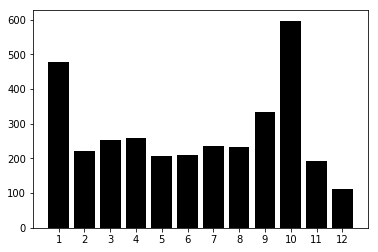

In [46]:

plt.bar(range(1,13), height = horrors.groupby('RelMonth').size(), tick_label = range(1,13), color = 'black')



October is clearly the month when most of these horror movies are being released, which makes perfect sense given the Halloween. On the other hand we don't want to be scared before X-mas, but then after the old year is gone, the horror makers come back!



We need a trick to get the release weekdays right, otherwise the days get sorted somehow randomly.


In [47]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_short = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [49]:
horrors['RelWeekday'] = pd.Categorical(horrors['RelWeekday'], categories = weekdays, ordered = True)

<BarContainer object of 7 artists>

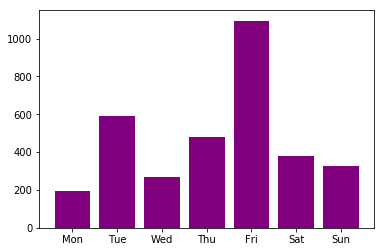

In [51]:
plt.bar(weekdays_short, height = horrors.groupby('RelWeekday').size(), color = 'purple')


Friday is definitely the most popular day to release these movies! Let's see how many are released on Friday, the 13th, and on Halloween.


In [62]:

horrors[(horrors['RelWeekday']=='Friday')&(horrors['RelDay']==13)]['Title'].size # movies released on Friday, the 13th.


57

In [64]:

horrors[(horrors['RelMonth']==10)&(horrors['RelDay']==31)]['Title'].size # movies released on Halloween


67


Now let's look at the 'Genres' column: only one value is missing there


In [65]:
horrors[horrors['Genres'].isnull() == True]

,Title,Genres,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,RelYear,RelMonth,RelDay,RelWeekday
866,The Returned,NaN,USA,NaN,NaN,NaN,"A Horror/Thriller about a young couple, strand...",NaN,NaN,NaN,NaN,2017,1,1,Sunday



From the plot description it seems like it's a horror/thriller, so this is how I'm going to fill this empty field:


In [66]:
horrors.loc[horrors['Genres'].isnull() == True, 'Genres'] = 'Horror| Thriller'


Let's look at the info again:


In [17]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 15 columns):
Title                3328 non-null object
Genres               3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3076 non-null float64
Movie Run Time       2784 non-null object
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
Year                 3328 non-null int64
Month                3328 non-null int64
Day                  3328 non-null int64
Weekday              3328 non-null object
dtypes: float64(1), int64(3), object(11)
memory usage: 390.1+ KB



There's a lot of info missing in the Movie Rating column, but as there seems to be no way to estimate how these movies were rated in various countries, I'm just going to leave it as is.
On the other hand the Review Rating, which is how the movie is rated by IMDB users, has only a few percent of the values missing. We can fill these NaNs with the median of all ratings, which is 5.0. 


In [67]:
horrors['Review Rating'].median()

5.0

In [68]:
horrors['Review Rating'] = horrors['Review Rating'].fillna(horrors['Review Rating'].median())

_TO BE CONTINUED..._

In [ ]:
Review Rating to floats
NaNs as median
extract run time in minutes, NaNs as median, convert to int
find missing genres, fill accordingly DONE
split genres into columns
create SciFi column, drop Sci and Fi
add zeroes where missing
find missing language, fill those for USA and UK with English, fill remaining with Unknown
extract director from the plot description
convert cast to lists of actors
extract numbers from budget, convert to integers
extract currencies, strip the unicode xa0 and spaces
convert $, £ and € to currency symbols

http://www.x-rates.com/graph/?from=USD&to=ARS -> could be used for scraping the rates, all the links are the same except for the currency symbol!

the values can be retrieved like this:

0.878144
under the following link: https://www.x-rates.com/table/?from=USD&amount=1

get the directors and actors into a list (or dictionary with how many times they occur), so that then it can be filtered